<a href="https://colab.research.google.com/github/kadarishiva/prediction-of-cardiovascular-attacks/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end supervised machine learning pipeline for predicting cardiovascular attacks.

I'm building a supervised learning model to predict cardiovascular attacks for this project. This information includes a variety of characteristics related to heart health. Doctors will be able to better understand which parameters will affect heart health by resolving this and forecasting the accuracy. With the use of this prediction, doctors may simply forecast their patients' future health conditions.



Dataset Link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?select=cardio_train.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.tree
import sklearn.svm
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model
import sklearn.model_selection
import sklearn.ensemble
from xgboost import XGBClassifier
import sklearn.neural_network
import sklearn.metrics

Imported the necessary packages to carry out the operations.

In [ ]:
df = pd.read_csv('/content/cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


The dataset was loaded using pandas packages.

## Data preprocessing

In [ ]:
df['age'] = (df['age']/365)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


The age was stated in days, which I converted to years.


In [ ]:
df['age'] = df['age'].round(0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


I'm rounding off the age to the nearest whole number for better performance.


In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Checking for the null values.

<Axes: xlabel='cardio', ylabel='count'>

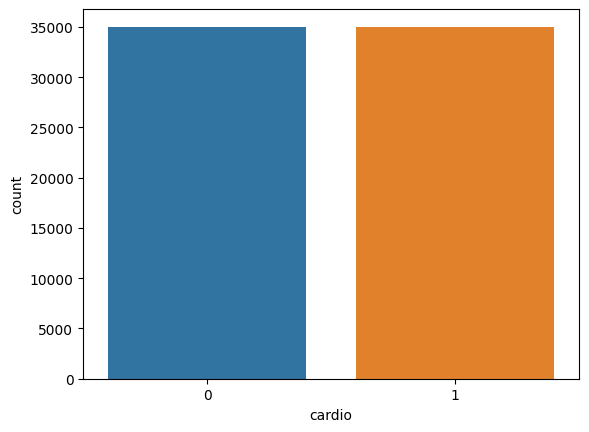

In [ ]:
sns.countplot(x=df["cardio"])

<Axes: xlabel='count', ylabel='age'>

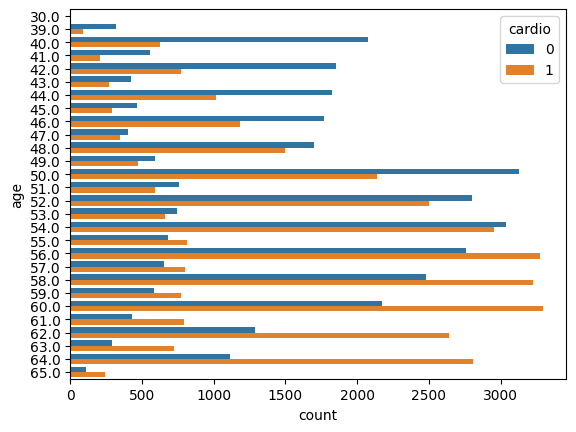

In [ ]:
sns.countplot(data=df, y="age", hue="cardio")

Plotted the age distribution of cardiac attacted vs non-attacted patients.


In [ ]:
df_alcohol_or_smoke = df.query("alco==1 or smoke==1")
print(df_alcohol_or_smoke.shape[0]*100/df.shape[0])

11.541428571428572


In [ ]:
df_cohol_smoke_cadrio = df_alcohol_or_smoke.query('cardio==1')
df_cohol_smoke_cadrio.shape[0]*100/df_alcohol_or_smoke.shape[0]

48.619878697858645

In [ ]:
df_alcohol_smoke = df.query("alco==1 and smoke==1")
print(df_alcohol_smoke.shape[0]*100/df.shape[0])

2.6485714285714286


In [ ]:
df_alcohol_smoke_cadrio = df_alcohol_smoke.query('cardio==1')
df_alcohol_smoke_cadrio.shape[0]*100/df_alcohol_smoke.shape[0]

44.44444444444444

comparing the effectiveness of cardio with the consumption of alcohol and smoking habits.

## Splitting the dataset

In [ ]:
x = df.drop(['cardio'], axis = 1)
y = df['cardio']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (52500, 12)
x_test: (17500, 12)
y_train: (52500,)
y_test: (17500,)


In this step, I dropped the target variable and assigned it to y. After that, I divided the data into test and train sets.


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

 Standardize the data.

## Algorithm Selection and Hyperparameter Tuning

In [ ]:
par_grid_1 = {
    'hidden_layer_sizes' : [(50,)],
    'activation' : ['relu'],
    'solver' : ['adam'],
    'alpha' : [0.1]
}

model_1 = sklearn.model_selection.GridSearchCV(sklearn.neural_network.MLPClassifier(), par_grid_1, scoring='accuracy', cv=5, n_jobs=-1)
model_1.fit(x_train, y_train)
print('accuracy = {:.2f}'.format(model_1.best_score_))
print('best hyperparameters of MLP = {}'.format(model_1.best_params_))

Results = pd.concat([Results, pd.DataFrame({'Model': ['MLP']})])
Results.loc[Results['Model'] == 'MLP', 'Accuracy'] = model_1.best_score_

Results

accuracy = 0.73
best hyperparameters of MLP = {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50,), 'solver': 'adam'}


,Model,Accuracy
0,LogisticRegression,0.677928
0,KNeighbors,0.687367
0,DecisionTree,0.699056
0,svm,0.690798
0,naivebayse,0.709512
0,MLP,0.729429


In [ ]:
par_grid_2 = {
     'n_estimators': [100],
     'criterion': ['friedman_mse'],
     'max_depth': [3],
     'learning_rate': [0.1],
     'subsample': [1.0],
     'min_samples_split': [2],
     'min_samples_leaf': [1],
     'max_features': [None]
}

model_2 = sklearn.model_selection.GridSearchCV(sklearn.ensemble.GradientBoostingClassifier(), par_grid_2, scoring='accuracy', cv=5, n_jobs=-1)
model_2.fit(x_train, y_train)
print('accuracy = {:.2f}'.format(model_2.best_score_))
print('best hyperparameters of GBC = {}'.format(model_2.best_params_))

Results = pd.concat([Results, pd.DataFrame({'Model': ['GBC']})])
Results.loc[Results['Model'] == 'GBC', 'Accuracy'] = model_2.best_score_

Results

accuracy = 0.74
best hyperparameters of GBC = {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


,Model,Accuracy
0,LogisticRegression,0.677928
0,KNeighbors,0.687367
0,DecisionTree,0.699056
0,svm,0.690798
0,naivebayse,0.709512
0,MLP,0.729429
0,GBC,0.735067


In [ ]:
par_grid_3 = {
    'learning_rate': [0.3],
    'n_estimators': [100],
    'max_depth': [6],
    'subsample':[0.8],
    'colsample_bytree':[1],
    'reg_alpha': [0],
    'reg_lambda':[1],
    'gamma':[0],
    'min_child_weight': [1]

}

model_3 = sklearn.model_selection.GridSearchCV(XGBClassifier(), par_grid_3, scoring='accuracy', cv=5, n_jobs=-1)
model_3.fit(x_train, y_train)
print('accuracy = {:.2f}'.format(model_3.best_score_))
print('best hyperparameters of XGB = {}'.format(model_3.best_params_))

Results = pd.concat([Results, pd.DataFrame({'Model': ['XGB']})])
Results.loc[Results['Model'] == 'XGB', 'Accuracy'] = model_3.best_score_

Results

accuracy = 0.73
best hyperparameters of XGB = {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}


,Model,Accuracy
0,LogisticRegression,0.677928
0,KNeighbors,0.687367
0,DecisionTree,0.699056
0,svm,0.690798
0,naivebayse,0.709512
0,MLP,0.729429
0,GBC,0.735067
0,XGB,0.729086


In [ ]:

par_grid_4 = {
    'n_estimators': [51],
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

model_4 = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), par_grid_4, scoring='accuracy', cv=5, n_jobs=-1)
model_4.fit(x_train, y_train)


print('accuracy = {:.2f}'.format(model_4.best_score_))
print('best hyperparameters of XGB = {}'.format(model_4.best_params_))

Results = pd.concat([Results, pd.DataFrame({'Model': ['RFC']})])
Results.loc[Results['Model'] == 'RFC', 'Accuracy'] = model_4.best_score_

Results

accuracy = 0.73
best hyperparameters of XGB = {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 51}


,Model,Accuracy
0,LogisticRegression,0.677928
0,KNeighbors,0.687367
0,DecisionTree,0.699056
0,svm,0.690798
0,naivebayse,0.709512
0,MLP,0.729429
0,GBC,0.735067
0,XGB,0.729086
0,RFC,0.732229


Because of my computational capabilities, I'm utilizing the default parameters for certain algorithms here.


I also tested various additional algorithms besides the ones given above, but the accuracy and other results were disappointing.


accuracy = 0.7384571428571428
precision = [0.70799641 0.77923293]
recall = [0.81107045 0.66594335]
support = [8744 8756]
f1 =  [0.75603646 0.71814767]
confisuion matrix [[7092 1652]
 [2925 5831]]


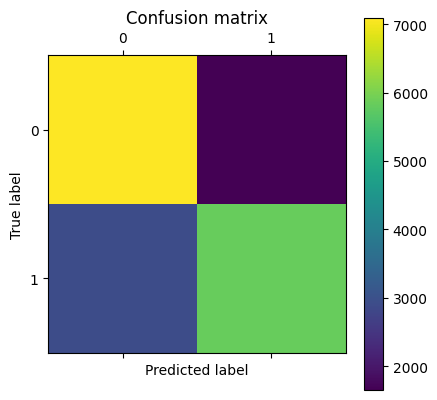

In [ ]:
y_predict = model_2.predict(x_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_predict)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(y_test, y_predict)
print('accuracy =',accuracy)
print('precision =', precision)
print('recall =', recall)
print('support =', support)
print('f1 = ', f1)
print('confisuion matrix', cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

I choose GradientBoostingClassifier because it provides slightly higher accuracy, F1 score, precision, and recall when compared to the remaining algorithms.


I created a pipeline to forecast the cardiac attacked rate. I've done things like load data, split data, execute grid searches to determine the best model, and predict accuracy.
